# About
This notebook shall investigate the mixture of odds
- based on the current season's win & losses
- historical NCAA wins & losses
***

# Preface
## Imports

In [32]:
import os
os.chdir("/home/jovyan/work")

from IPython.core.display import HTML
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sqlalchemy import text

from src.utils import calc_odds, get_connection

## Config

In [33]:
%matplotlib inline
sns.set()
HTML("""
<style>
.output_png{
text-align:center;
}
</style>
""")

***
# Get enhanced regular season data

In [5]:
df_ncaa_results_wins_losses_regular_season = pd.read_sql(
    sql=text("""
SELECT
ncaa.season as season,
ncaa.w_team_id as team_id_a,
wins_a.wins as wins_a,
losses_a.losses as losses_a,
ncaa.l_team_id as team_id_b,
wins_b.wins as wins_b,
losses_b.losses as losses_b
FROM t_original_ncaa_tourney_compact_results ncaa

-- join info about winning team
JOIN t_derived_wins_per_team_per_season wins_a
    ON ncaa.w_team_id = wins_a.team_id
    AND ncaa.season = wins_a.season
    
JOIN t_derived_losses_per_team_per_season losses_a
    ON ncaa.w_team_id = losses_a.team_id
    AND ncaa.season = losses_a.season
    
-- join info about losing team
JOIN t_derived_wins_per_team_per_season wins_b
    ON ncaa.l_team_id = wins_b.team_id
    AND ncaa.season = wins_b.season
    
JOIN t_derived_losses_per_team_per_season losses_b
    ON ncaa.l_team_id = losses_b.team_id
    AND ncaa.season = losses_b.season
    """),
    con=get_connection()
)
df_ncaa_results_wins_losses_regular_season.head()

,season,team_id_a,wins_a,losses_a,team_id_b,wins_b,losses_b
0,1985,1116,21,12,1234,20,10
1,1985,1120,18,11,1345,17,8
2,1985,1207,25,2,1250,11,18
3,1985,1229,20,7,1425,19,9
4,1985,1242,23,7,1325,20,7


# Get odds for regular season

In [10]:
df_odds_regular_season = calc_odds(df_ncaa_results_wins_losses_regular_season, 100, 100)
df_odds_regular_season.head()

,season,team_id_a,wins_a,losses_a,team_id_b,wins_b,losses_b,odds_a
0,1985,1116,21,12,1234,20,10,0.3981
1,1985,1120,18,11,1345,17,8,0.3125
2,1985,1207,25,2,1250,11,18,1.0000
3,1985,1229,20,7,1425,19,9,0.6988
4,1985,1242,23,7,1325,20,7,0.5856


# Get enhanced historic season data

In [6]:
df_ncaa_results_wins_losses_historical = pd.read_sql(
    sql=text("""
SELECT
ncaa.season as season,
ncaa.w_team_id as team_id_a,
wins_a.wins as wins_a,
losses_a.losses as losses_a,
ncaa.l_team_id as team_id_b,
wins_b.wins as wins_b,
losses_b.losses as losses_b
FROM t_original_ncaa_tourney_compact_results ncaa

-- join info about winning team
JOIN t_derived_ncaa_wins_per_team wins_a
    ON ncaa.w_team_id = wins_a.team_id
    
JOIN t_derived_ncaa_losses_per_team losses_a
    ON ncaa.w_team_id = losses_a.team_id
    
-- join info about losing team
JOIN t_derived_ncaa_wins_per_team wins_b
    ON ncaa.l_team_id = wins_b.team_id
    
JOIN t_derived_ncaa_losses_per_team losses_b
    ON ncaa.l_team_id = losses_b.team_id
    """),
    con=get_connection()
)
df_ncaa_results_wins_losses_historical.head()

,season,team_id_a,wins_a,losses_a,team_id_b,wins_b,losses_b
0,1985,1116,30,18,1234,16,17
1,1985,1120,12,7,1345,28,24
2,1985,1207,33,21,1250,1,5
3,1985,1229,2,4,1425,9,12
4,1985,1242,80,30,1325,3,5


# Get odds for regular season

In [11]:
df_odds_historical = calc_odds(df_ncaa_results_wins_losses_historical, 100, 100)
df_odds_historical.head()

,season,team_id_a,wins_a,losses_a,team_id_b,wins_b,losses_b,odds_a
0,1985,1116,30,18,1234,16,17,0.8952
1,1985,1120,12,7,1345,28,24,0.7792
2,1985,1207,33,21,1250,1,5,0.9876
3,1985,1229,2,4,1425,9,12,0.3166
4,1985,1242,80,30,1325,3,5,0.9779


# Join historic and regular season odds

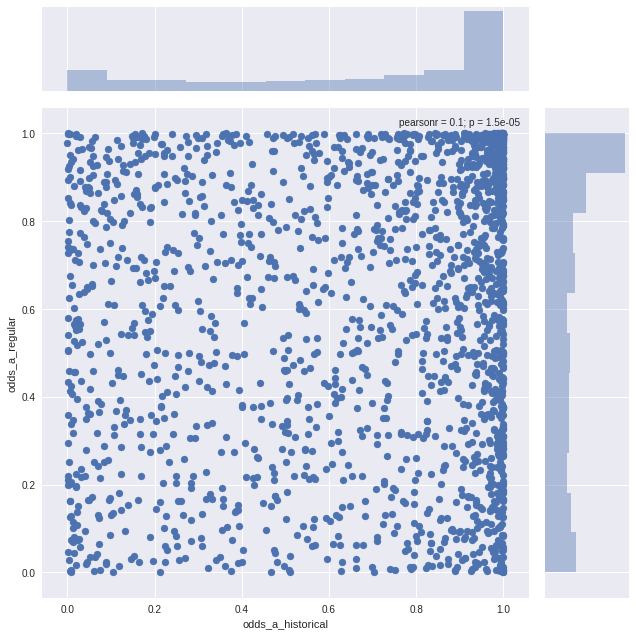

In [56]:
# join odds
df_odds_merged = pd.merge(
    df_odds_historical[["season", "team_id_a", "team_id_b", "odds_a"]],
    df_odds_regular_season[["season", "team_id_a", "team_id_b", "odds_a"]],
    on = ["season", "team_id_a", "team_id_b"],
    suffixes = ("_historical", "_regular")
)
# plot joint distribution
sns.jointplot(x=df_odds_merged["odds_a_historical"], y=df_odds_merged["odds_a_regular"],size=9);
#plt.savefig("./figures/04_jgoerner_regular_historical_odds_mixed.png");

In [ ]:
df